<a href="https://colab.research.google.com/github/debo004/Fashion_MNIST_Classification_CNN/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing The Libraries**
numpy - array Handling , Linear Algebra ||
pandas - data processing, CSV file I/O (e.g. pd.read_csv) ||
tensorflow -  model tracking, performance monitoring, and model retraining ||
matplotlib - for plotting the pixels

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow as tf
import math
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

### **Reading The Datasets**

In [2]:
dataset,metadata =tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8TRU5G/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8TRU5G/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


### **Making the List of The Labels**

In [3]:
class_names=metadata.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### **Exploring The Data**

In [5]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples

print("Number of training examples : {}".format(num_train_examples))
print("number of testing examples : {}".format(num_test_examples))

Number of training examples : 60000
number of testing examples : 10000


### **Preprocess The Data**
The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [6]:
def Normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels


# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset=train_dataset.map(Normalize)
test_dataset=test_dataset.map(Normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster

train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()

### **Explore The Preprocessed Data**

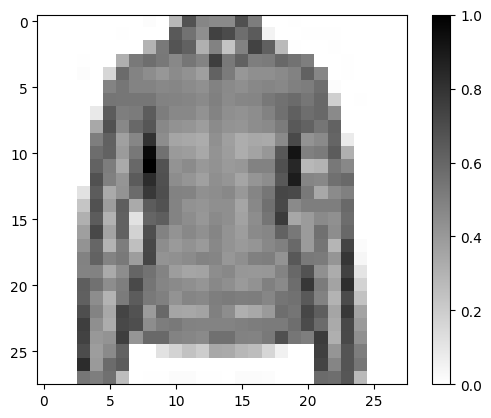

In [7]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))


plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

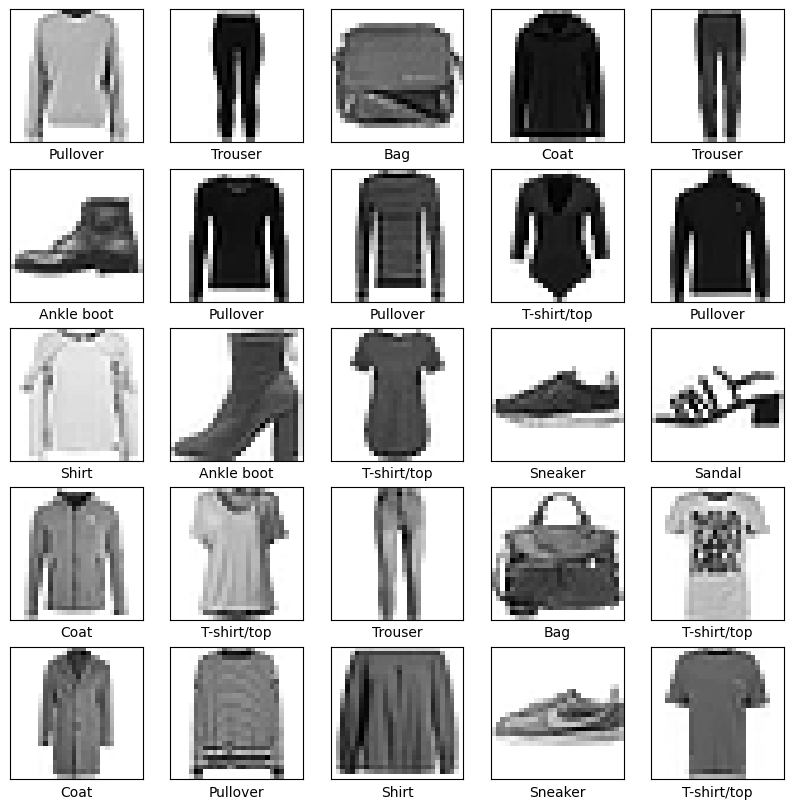

In [8]:
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(train_dataset.take(25)):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

## **Building The Model**

In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

## **Compile The Model**

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

## **Train The Model**

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)
model.fit(train_dataset,epochs=20,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/20
1875/1875 [==============================] - 87s 42ms/step - loss: 0.3889 - accuracy: 0.8594
Epoch 2/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2588 - accuracy: 0.9048
Epoch 3/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2136 - accuracy: 0.9221
Epoch 4/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1836 - accuracy: 0.9325
Epoch 5/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1569 - accuracy: 0.9406
Epoch 6/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1323 - accuracy: 0.9509
Epoch 7/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1112 - accuracy: 0.9579
Epoch 8/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0946 - accuracy: 0.9653
Epoch 9/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0794 - accuracy: 0.9701
Epoch 10/20
1875/1875 [==============================] - 76s 41m

### **Evaluate The Accuracy**

In [12]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print(f'The accuracy on test dataset is :{test_accuracy}')

313/313 [==============================] - 8s 23ms/step - loss: 0.5620 - accuracy: 0.9190
The accuracy on test dataset is :0.9190000295639038


## **Make predictions and explore**

In [13]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 228ms/step


In [14]:
predictions.shape

(32, 10)

In [15]:
predictions[0]

array([9.9412434e-10, 1.8275787e-12, 4.9398933e-04, 2.1538507e-11,
       9.9547976e-01, 3.5660556e-13, 4.0257513e-03, 2.6187911e-11,
       2.4515420e-10, 4.5905853e-07], dtype=float32)

In [16]:
np.argmax(predictions[0])

4

In [17]:
test_labels[0]

4

In [18]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

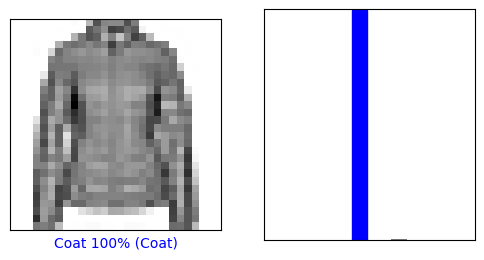

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

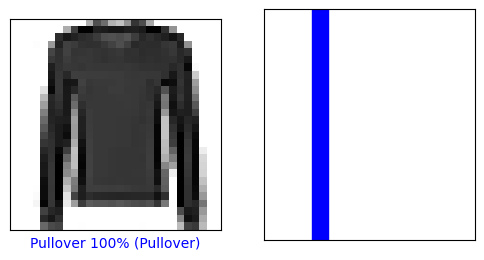

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

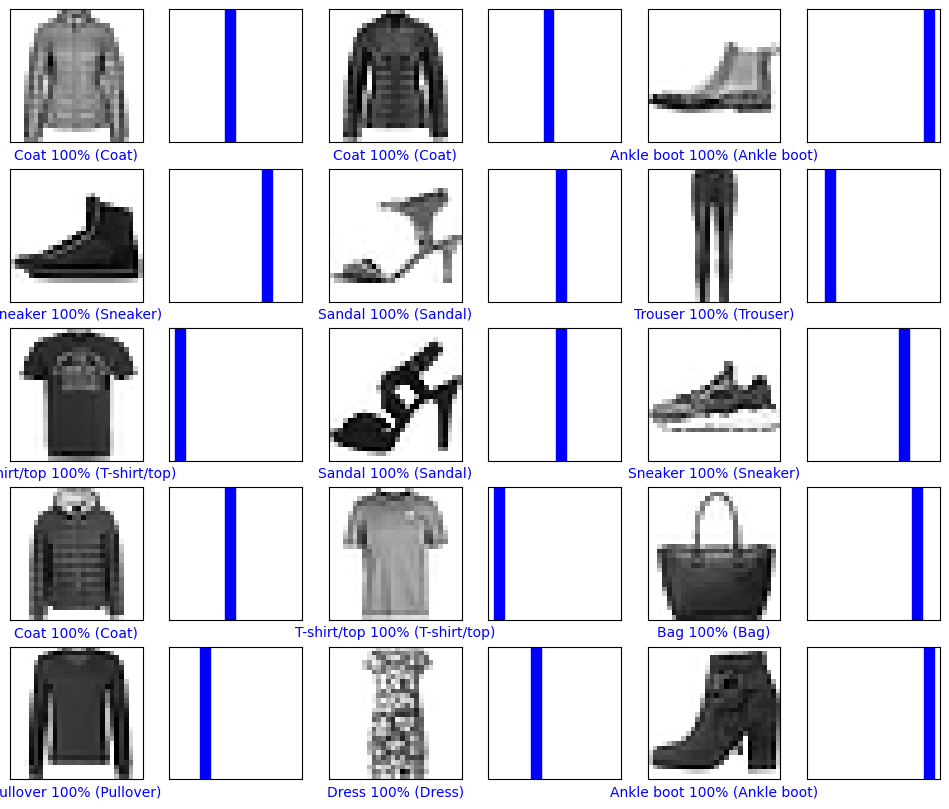

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [23]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 74ms/step
[[9.9412045e-10 1.8275719e-12 4.9398892e-04 2.1538426e-11 9.9547982e-01
  3.5660559e-13 4.0257382e-03 2.6187765e-11 2.4515326e-10 4.5905767e-07]]


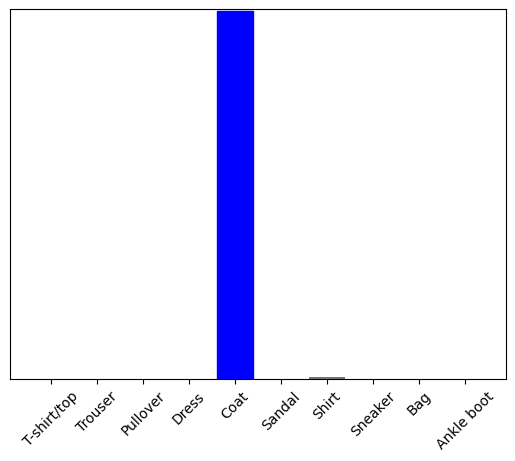

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

4